In [2]:
import re
import csv

def parse_log_entry(line):
    """ Parse log entry for trial details """
    try:
        trial_info = re.search(r"Trial (\d+) finished with value: ([0-9.]+) and parameters: ({.*})", line).groups()
        trial_number = int(trial_info[0])
        score = float(trial_info[1])
        params = eval(trial_info[2])
        
        return {
            'Trial Number': trial_number,
            'Epoch Number': params['epochs'],
            'Batch Size': params['batch_size'],
            'Learning Rate': params['lr'],
            'Momentum': params['momentum'],
            'Score': score
        }
    except:
        return None

def process_log_file(filepath, output_csv):
    with open(filepath, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    trials = [parse_log_entry(line) for line in lines if 'Trial' in line and 'finished with value' in line]
    trials = [trial for trial in trials if trial is not None]  # Filter out any failed parsing attempts

    # Writing to CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Trial Number', 'Epoch Number', 'Batch Size', 'Learning Rate', 'Momentum', 'Score']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        for trial in trials:
            writer.writerow(trial)

# Usage
log_filepath = 'output.txt'
output_csv_path = 'output_trials.csv'
process_log_file(log_filepath, output_csv_path)


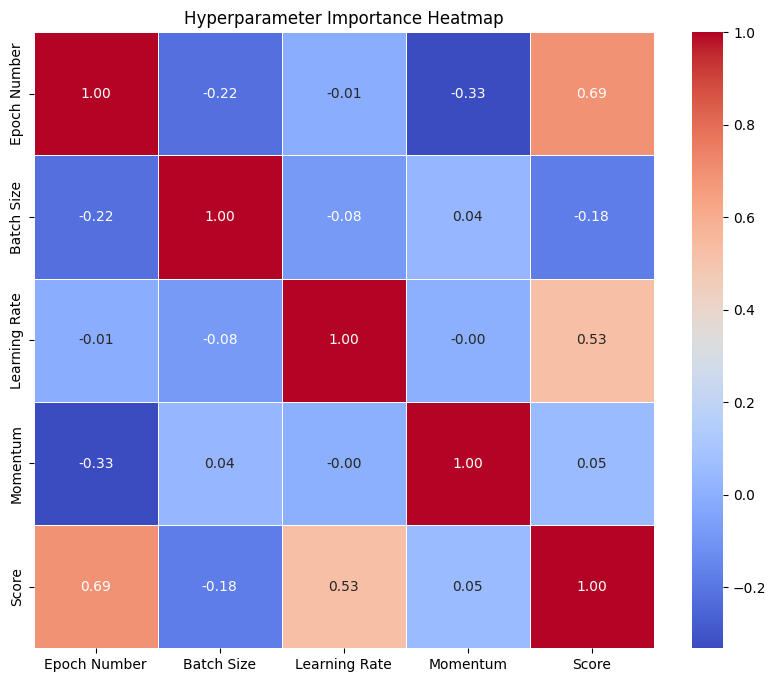

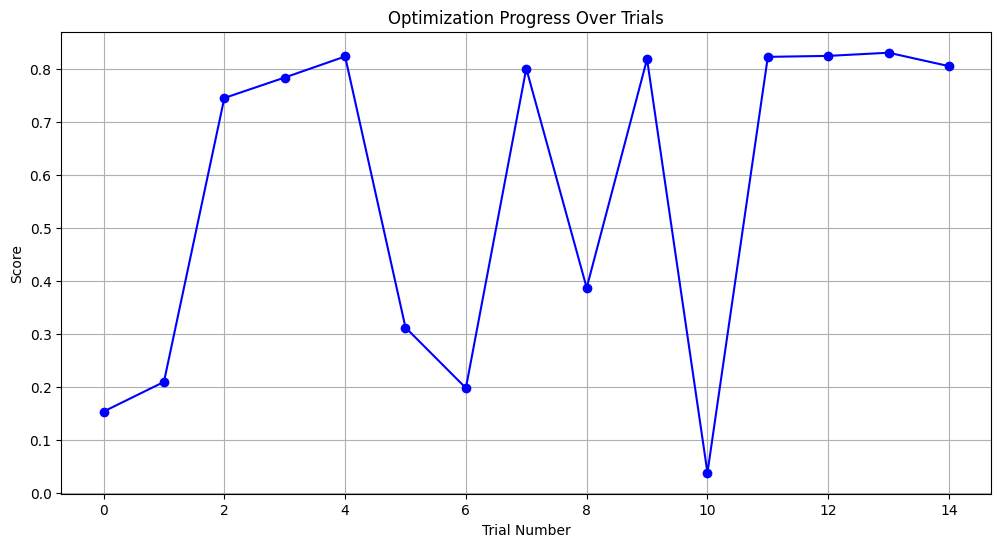

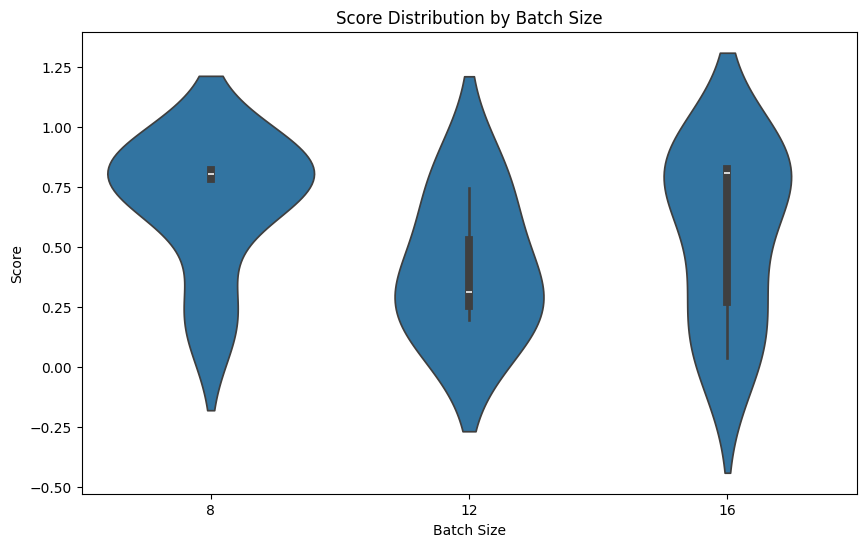

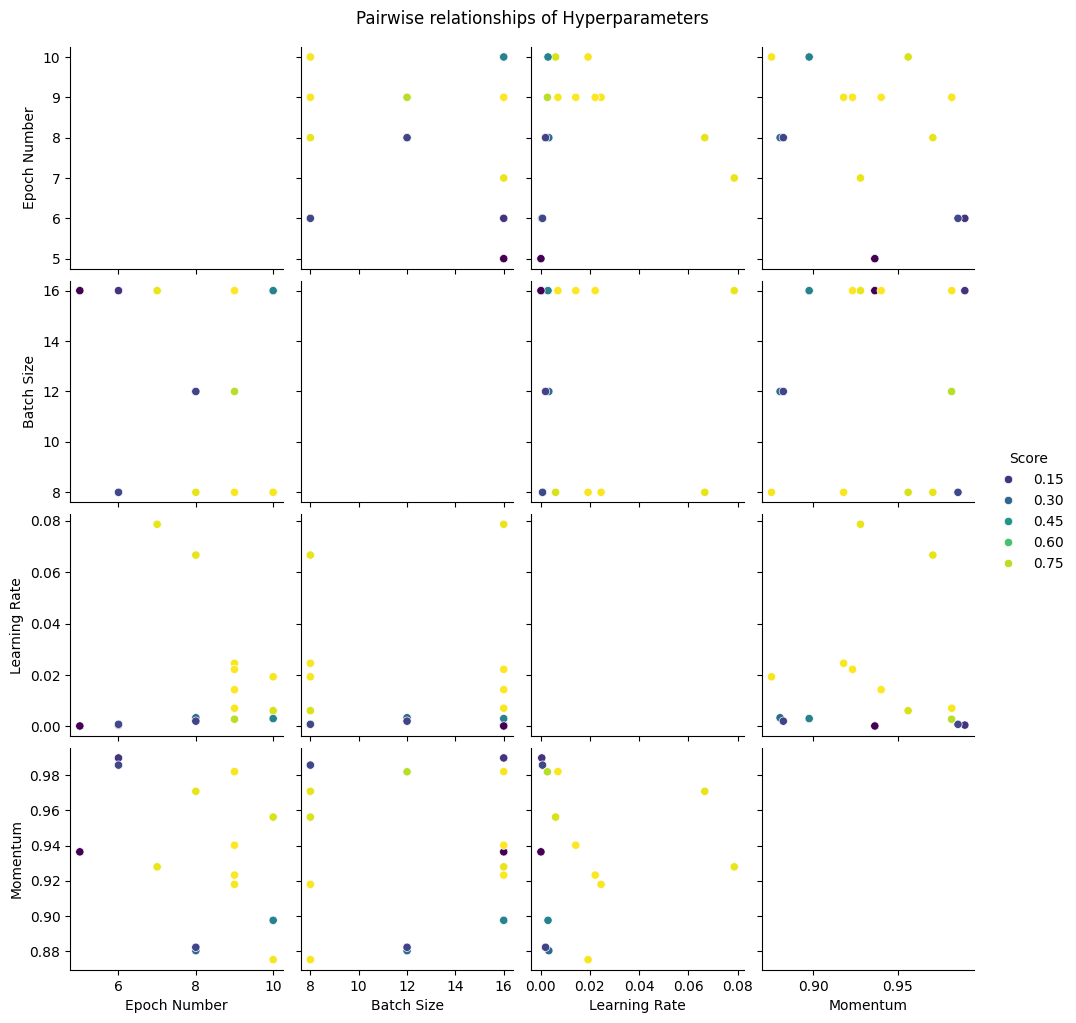

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('output_trials.csv')

# Selecting only the columns that are relevant for the heatmap
relevant_columns = ['Epoch Number', 'Batch Size', 'Learning Rate', 'Momentum', 'Score']
df = df[relevant_columns]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Hyperparameter Importance Heatmap')
plt.savefig('heatmap.png')  # Save the heatmap as PNG file
plt.show()

# Optimization Progress Over Trials
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Score'], marker='o', linestyle='-', color='b')
plt.title('Optimization Progress Over Trials')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.grid(True)
plt.savefig('optimization_progress.png')
plt.show()

# Violin Plot for Batch Size Distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Batch Size', y='Score', data=df)
plt.title('Score Distribution by Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Score')
plt.savefig('violin_plot_batch_size.png')
plt.show()

# Pair Plot for Hyperparameters
sns.pairplot(df, vars=['Epoch Number', 'Batch Size', 'Learning Rate', 'Momentum'], hue='Score', palette='viridis')
plt.suptitle('Pairwise relationships of Hyperparameters', y=1.02)  # Adjust the title upward
plt.savefig('pairplot_hyperparameters.png')
plt.show()


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('output_trials.csv')


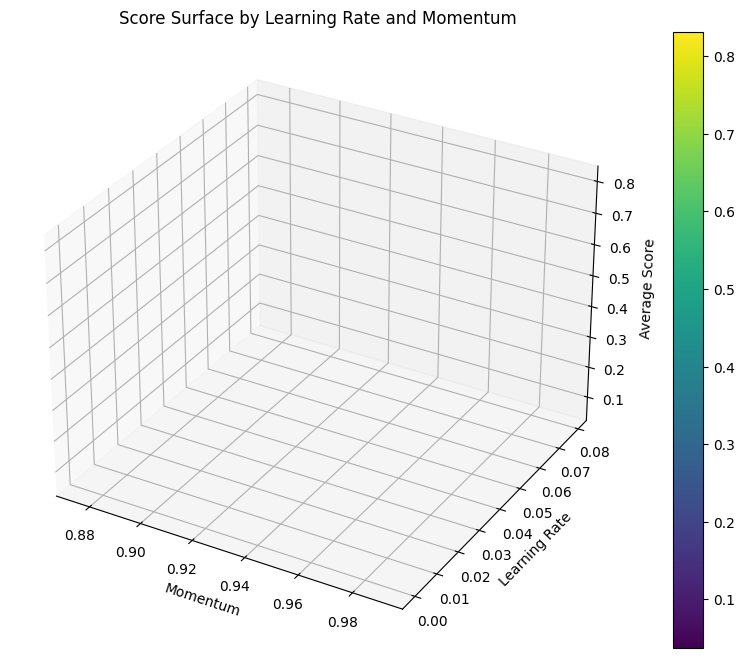

In [9]:
def plot_3d_surface(df, x, y, z, filename):
    pivot_table = df.pivot_table(values=z, index=x, columns=y, aggfunc=np.mean)
    X = pivot_table.columns.values
    Y = pivot_table.index.values
    X, Y = np.meshgrid(X, Y)
    Z = pivot_table.values

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf)
    ax.set_xlabel(y)
    ax.set_ylabel(x)
    ax.set_zlabel('Average Score')
    ax.set_title(f'Score Surface by {x} and {y}')
    plt.savefig(filename)
    plt.show()

plot_3d_surface(df, 'Learning Rate', 'Momentum', 'Score', '3d_surface_plot.png')


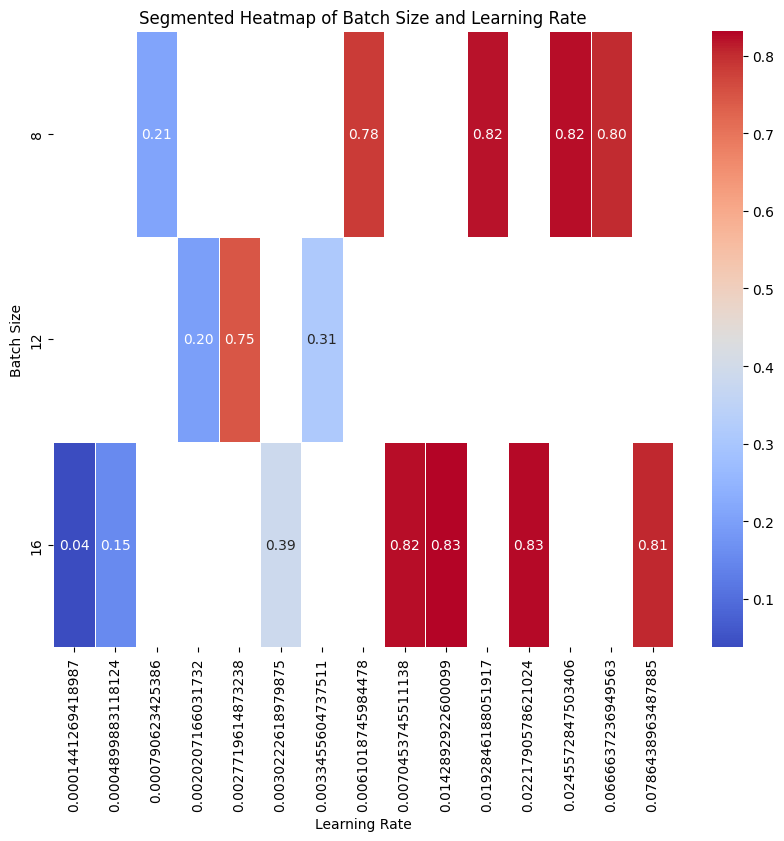

In [6]:
def plot_segmented_heatmaps(df, x, y, z, filename):
    pivot_table = df.pivot_table(values=z, index=x, columns=y, aggfunc=np.mean)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Segmented Heatmap of {x} and {y}')
    plt.savefig(filename)
    plt.show()

plot_segmented_heatmaps(df, 'Batch Size', 'Learning Rate', 'Score', 'segmented_heatmap.png')


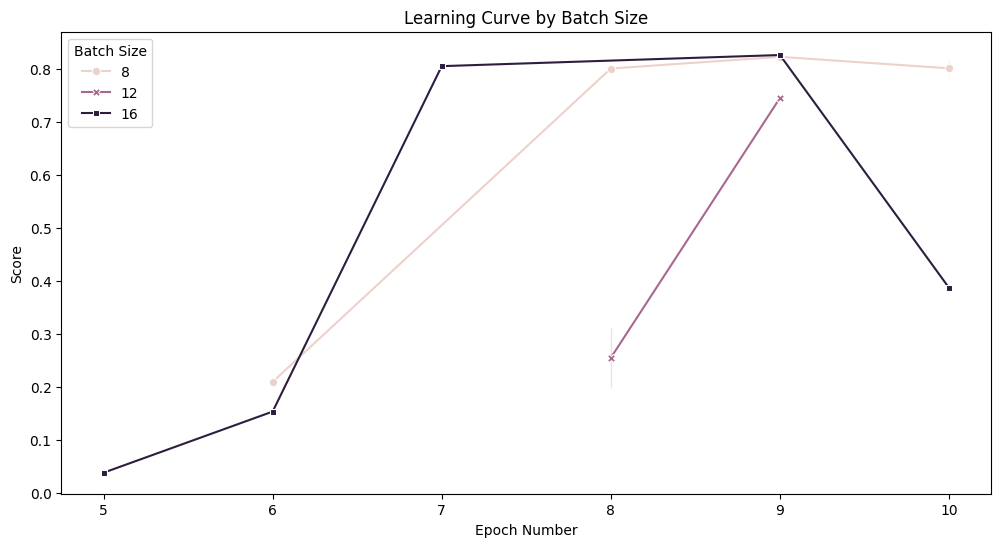

In [7]:
def plot_learning_curve(df, x, y, filename):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=x, y=y, hue='Batch Size', style='Batch Size', markers=True, dashes=False)
    plt.title('Learning Curve by Batch Size')
    plt.xlabel('Epoch Number')
    plt.ylabel('Score')
    plt.savefig(filename)
    plt.show()

plot_learning_curve(df, 'Epoch Number', 'Score', 'learning_curve.png')


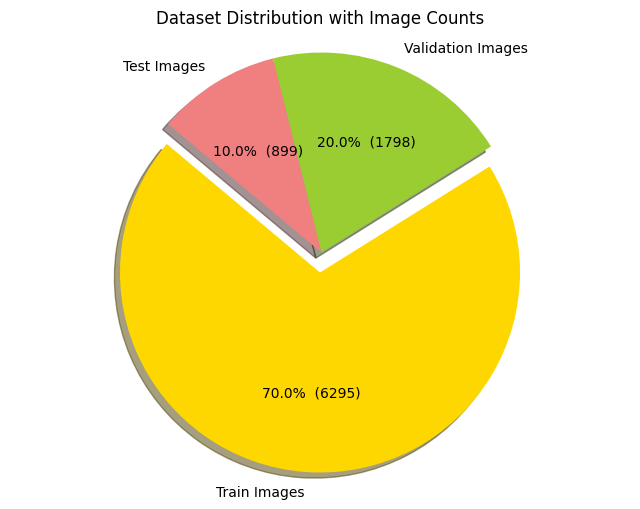

In [11]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Train Images', 'Validation Images', 'Test Images'
sizes = [6295, 1798, 899]  # Number of images in each set
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Explode the 1st slice (Train)

# Function to format the text to be displayed on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes), shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Dataset Distribution with Image Counts')
plt.savefig('dataset_distribution_pie_chart_with_numbers.png')  # Save the figure to file
plt.show()
